# Leer datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

breasst_cancer = load_breast_cancer(as_frame=True)
breasst_cancer = breasst_cancer.frame
breasst_cancer.drop(columns=['target'], inplace=True)
breasst_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Realizamos los clusters

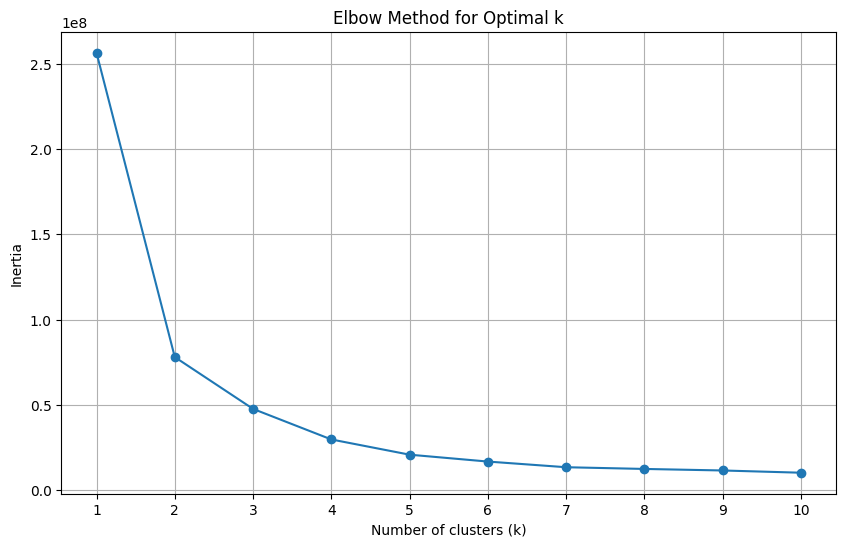

In [2]:
#hagamos metodo del codo para determinar el numero de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_k=10):
    inertia = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid()
    plt.show()
# Aplicar el método del codo
elbow_method(breasst_cancer)

In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(breasst_cancer)
kmeans_labels = kmeans.labels_
aglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aglo.fit(breasst_cancer)
aglo_labels = aglo.labels_
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(breasst_cancer)
gmm_labels = gmm.predict(breasst_cancer)

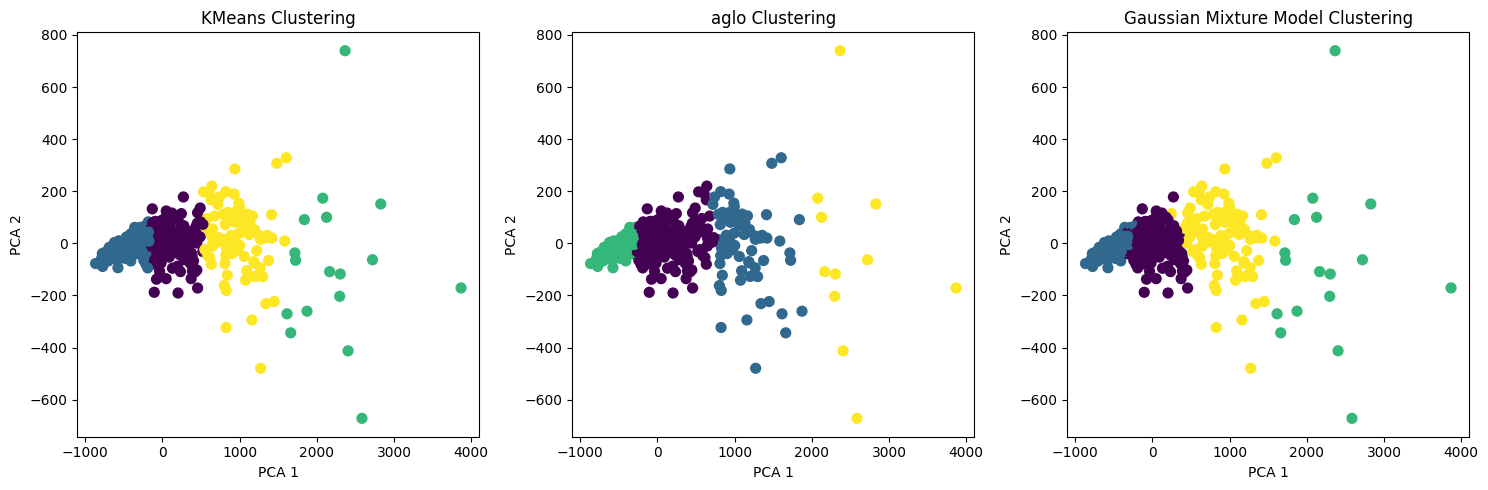

In [30]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
breasst_cancer_pca = pca.fit_transform(breasst_cancer)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(breasst_cancer_pca[:, 0], breasst_cancer_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 2)
plt.scatter(breasst_cancer_pca[:, 0], breasst_cancer_pca[:, 1], c=aglo_labels, cmap='viridis', s=50)
plt.title('aglo Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 3)
plt.scatter(breasst_cancer_pca[:, 0], breasst_cancer_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(breasst_cancer, kmeans_labels)
aglo_silhouette = silhouette_score(breasst_cancer, aglo_labels)
gmm_silhouette = silhouette_score(breasst_cancer, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'aglo Silhouette Score: {aglo_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.54
aglo Silhouette Score: 0.51
Gaussian Mixture Model Silhouette Score: 0.50


# Interpretar

In [32]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [33]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(breasst_cancer, kmeans_labels, test_size=0.2, random_state=42)


In [34]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [1.51635172e+01 1.98013103e+01 9.91618621e+01 7.15441379e+02
 9.73365517e-02 1.17866000e-01 1.07192345e-01 5.86521862e-02
 1.83219310e-01 6.17755862e-02 4.03319310e-01 1.10961103e+00
 2.86533103e+00 3.85456552e+01 6.32053793e-03 2.77968690e-02
 3.50536276e-02 1.29235448e-02 1.90824690e-02 3.67425379e-03
 1.75777241e+01 2.68287586e+01 1.16595931e+02 9.55204138e+02
 1.34690759e-01 3.06586690e-01 3.44142828e-01 1.39945793e-01
 3.03866207e-01 8.61976552e-02]
Cluster 1: [1.17166426e+01 1.81406897e+01 7.53000313e+01 4.27600000e+02
 9.40168966e-02 8.19697492e-02 4.75768361e-02 2.54088934e-02
 1.76537304e-01 6.39343260e-02 2.79908777e-01 1.25827367e+00
 1.97046614e+00 2.00471097e+01 7.50159875e-03 2.19582571e-02
 2.64591492e-02 9.84581191e-03 2.12115987e-02 3.75635266e-03
 1.29391818e+01 2.39799060e+01 8.41389342e+01 5.19238871e+02
 1.28564796e-01 1.94207022e-01 1.75870022e-01 7.51946740e-02
 2.77284639e-01 8.20778370e-02]
Cluster 2: [2.34335294e+01 2.2963529

In [35]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.96


In [36]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("aglo Ripper Rules:", len(rules))
print("aglo Ripper Rules:", len(rules1))
ripper.print_rules()

aglo Ripper Rules: 6
aglo Ripper Rules: 10

Reglas para clase: 0
[[worstarea=915.24-1243.4] V [worstarea=784.04-915.24] V [worstarea=686.6-784.04^meanradius=14.07-15.0] V [worstperimeter=97.67-105.84^worstcompactness=0.092-0.13] V [worstperimeter=115.56-133.34] V [meanradius=15.0-17.05]]

Reglas para clase: 1
[[worstarea=599.3-686.6] V [meanradius=<10.26] V [worstarea=544.4-599.3] V [worstarea=475.48-544.4] V [meanradius=10.26-11.37] V [worstarea=686.6-784.04^meanperimeter=81.97-85.98] V [worstarea=686.6-784.04^meanperimeter=85.98-91.28^perimetererror=2.06-2.29] V [meanradius=11.37-12.04] V [meanradius=13.3-14.07^radiuserror=0.18-0.22] V [worstperimeter=91.27-97.67]]

Reglas para clase: 2
[[worstradius=>23.7^areaerror=>90.18]]

Reglas para clase: 3
[[worstradius=>23.7^areaerror=52.37-90.18] V [worstradius=20.22-23.7^worstconcavity=0.36-0.43] V [areaerror=>90.18^smoothnesserror=0.0058-0.0064] V [worstradius=20.22-23.7^meanperimeter=>128.66] V [meanradius=17.05-19.5^worstperimeter=133.34

Decision Tree Accuracy: 0.96


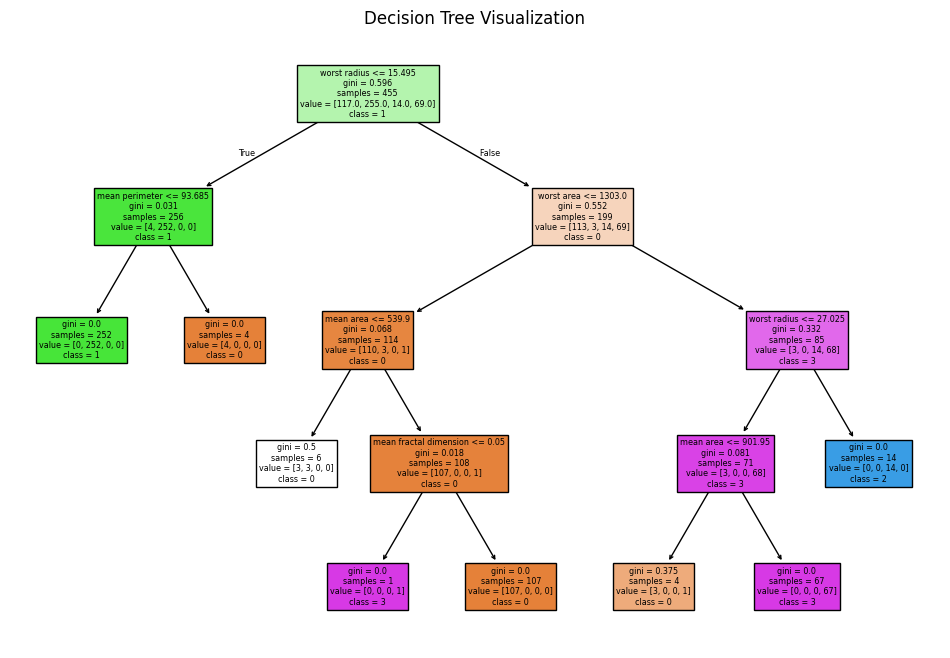

In [37]:
tree = DecisionTreeClassifier(random_state=44, max_depth=5, min_samples_split=10)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=breasst_cancer.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [38]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=breasst_cancer.columns.tolist())


Optimization started

Training time: 20.57s, epochs: 200

Least training loss reached: 0.016


In [39]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.574] R23: mean compactness > 0.139
			0: 0.424	1: 0.000	2: 0.259	3: 0.095	Unc: 0.222

	[0.554] R36: mean fractal dimension < 0.058
			0: 0.362	1: 0.000	2: 0.487	3: 0.000	Unc: 0.151

	[0.552] R96: worst smoothness < 0.116
			0: 0.496	1: 0.118	2: 0.000	3: 0.000	Unc: 0.386

	[0.544] R94: 876.987 < worst area < 1259.456
			0: 0.544	1: 0.000	2: 0.000	3: 0.000	Unc: 0.456

	[0.540] R109: 0.070 < worst concave points < 0.114
			0: 0.462	1: 0.169	2: 0.000	3: 0.000	Unc: 0.369

	[0.539] R79: fractal dimension error > 0.006
			0: 0.340	1: 0.207	2: 0.000	3: 0.308	Unc: 0.145

	[0.521] R30: 0.048 < mean concave points < 0.074
			0: 0.407	1: 0.000	2: 0.000	3: 0.259	Unc: 0.334

	[0.515] R10: 91.882 < mean perimeter < 108.269
			0: 0.515	1: 0.000	2: 0.000	3: 0.000	Unc: 0.485

	[0.506] R38: 0.063 < mean fractal dimension < 0.068
			0: 0.386	1: 0.277	2: 0.000	3: 0.000	Unc: 0.337

	[0.490] R2: 14.118 < mean radius < 16.500
			0: 0.490	1: 0.000	2: 0.000	3: 0.000	Unc: 

In [40]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.92


## aglo

In [41]:
#dividir los datos en entrenamiento y prueba
n_clusters_aglo = len(np.unique(aglo_labels))
max_label = np.max(aglo_labels)
aglo_labels = np.where(aglo_labels == -1, max_label + 1, aglo_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(breasst_cancer, aglo_labels, test_size=0.2, random_state=42)


In [42]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.82


In [43]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("aglo Ripper Rules:", len(rules))
print("aglo Ripper Rules:", len(rules1))
ripper.print_rules()

aglo Ripper Rules: 8
aglo Ripper Rules: 8

Reglas para clase: 0
[[worstperimeter=105.84-115.56] V [worstperimeter=115.56-133.34] V [meanradius=13.3-14.07] V [worstperimeter=97.67-105.84^worstradius=14.97-16.04] V [worstperimeter=133.34-157.4^worstconcavepoints=0.18-0.21] V [worstperimeter=97.67-105.84^worstradius=16.04-17.35] V [worstperimeter=133.34-157.4^worstsymmetry=0.31-0.33] V [meanconcavity=0.088-0.11^textureerror=0.78-0.9]]

Reglas para clase: 1
[[worstradius=>23.7^radiuserror=0.52-0.74] V [worstradius=20.22-23.7^perimetererror=3.72-4.89] V [meanradius=>19.5^meanconcavepoints=0.085-0.099] V [perimetererror=>4.89^worstarea=>1658.8^fractaldimensionerror=0.0048-0.0062] V [worstarea=1243.4-1658.8^meanradius=>19.5] V [perimetererror=>4.89^symmetryerror=0.02-0.022] V [worstradius=>23.7^meanconcavity=0.15-0.2] V [worstradius=>23.7^compactnesserror=>0.049]]

Reglas para clase: 2
[[meanarea=396.48-445.44] V [meanradius=<10.26] V [meanarea=321.6-396.48] V [meanarea=445.44-497.4] V [meana

Decision Tree Accuracy: 0.98


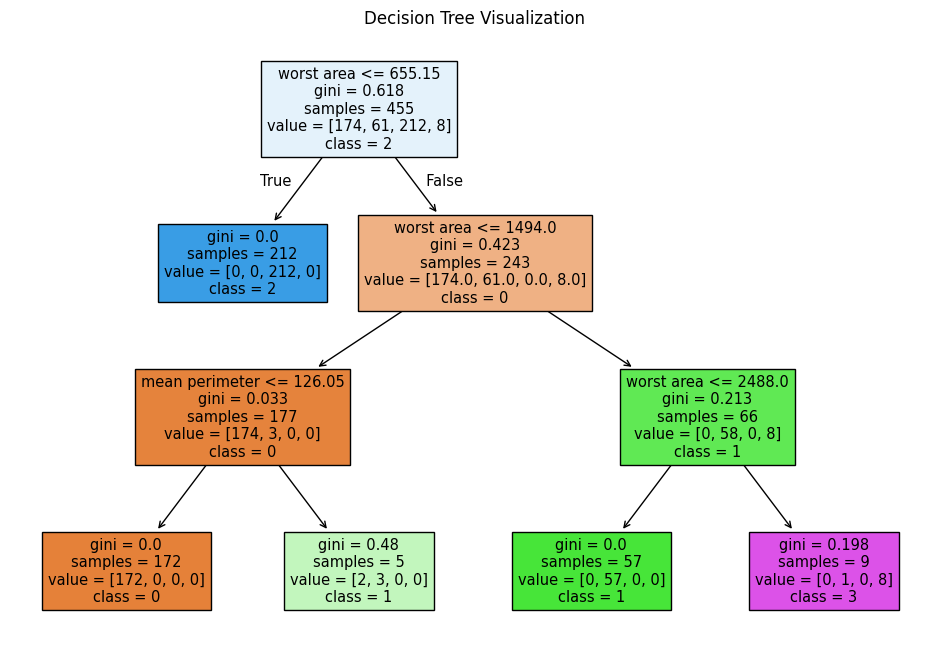

In [44]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5, min_samples_split=10, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=breasst_cancer.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [45]:
ds = DSClassifierMultiQ(n_clusters_aglo, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=breasst_cancer.columns.tolist())


Optimization started

Training time: 20.72s, epochs: 200

Least training loss reached: 0.032


In [46]:
ds.print_most_important_rules(threshold=0.001)



Most important rules for class 0

	[0.626] R23: mean compactness > 0.139
			0: 0.452	1: 0.409	2: 0.000	3: 0.006	Unc: 0.133

	[0.569] R19: mean smoothness > 0.105
			0: 0.343	1: 0.000	2: 0.600	3: 0.001	Unc: 0.056

	[0.558] R31: mean concave points > 0.074
			0: 0.443	1: 0.248	2: 0.000	3: 0.012	Unc: 0.298

	[0.551] R22: 0.104 < mean compactness < 0.139
			0: 0.539	1: 0.000	2: 0.024	3: 0.000	Unc: 0.436

	[0.528] R56: smoothness error < 0.005
			0: 0.528	1: 0.000	2: 0.000	3: 0.000	Unc: 0.472

	[0.487] R26: 0.089 < mean concavity < 0.142
			0: 0.355	1: 0.314	2: 0.000	3: 0.000	Unc: 0.331

	[0.464] R77: 0.002 < fractal dimension error < 0.004
			0: 0.362	1: 0.233	2: 0.000	3: 0.000	Unc: 0.405

	[0.463] R94: 876.987 < worst area < 1259.456
			0: 0.463	1: 0.000	2: 0.000	3: 0.000	Unc: 0.537

	[0.460] R36: mean fractal dimension < 0.058
			0: 0.324	1: 0.330	2: 0.000	3: 0.000	Unc: 0.346

	[0.460] R96: worst smoothness < 0.116
			0: 0.405	1: 0.000	2: 0.116	3: 0.000	Unc: 0.479

	[0.457] R41: 0.211 

In [47]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.82


## GMM

In [48]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(breasst_cancer, gmm_labels, test_size=0.2, random_state=42)


In [49]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.89


In [50]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("aglo Ripper Rules:", len(rules))
print("aglo Ripper Rules:", len(rules1))
ripper.print_rules()

aglo Ripper Rules: 13
aglo Ripper Rules: 11

Reglas para clase: 0
[[worstperimeter=105.84-115.56] V [worstperimeter=97.67-105.84] V [worstradius=17.35-20.22^meanradius=15.0-17.05^worstcompactness=>0.44] V [worstperimeter=115.56-133.34^meanradius=15.0-17.05] V [worstperimeter=91.27-97.67^meanradius=13.3-14.07^meancompactness=0.059-0.068] V [worstperimeter=91.27-97.67^meancompactness=0.047-0.059] V [worstperimeter=91.27-97.67^compactnesserror=<0.0092] V [meanradius=14.07-15.0] V [meanperimeter=81.97-85.98^meanconcavity=0.045-0.062] V [meanradius=15.0-17.05^meansymmetry=0.185-0.193] V [worstperimeter=91.27-97.67^areaerror=16.97-19.3] V [worstradius=14.97-16.04] V [worstradius=17.35-20.22^meanconcavity=0.15-0.2]]

Reglas para clase: 1
[[worstradius=11.19-12.48] V [worstarea=544.4-599.3^meanperimeter=77.59-81.97] V [worstarea=475.48-544.4] V [worstradius=<11.19] V [worstarea=544.4-599.3^textureerror=1.1-1.22] V [meanradius=12.74-13.3^textureerror=1.22-1.36] V [worstradius=13.32-13.98^worstf

Decision Tree Accuracy: 0.96


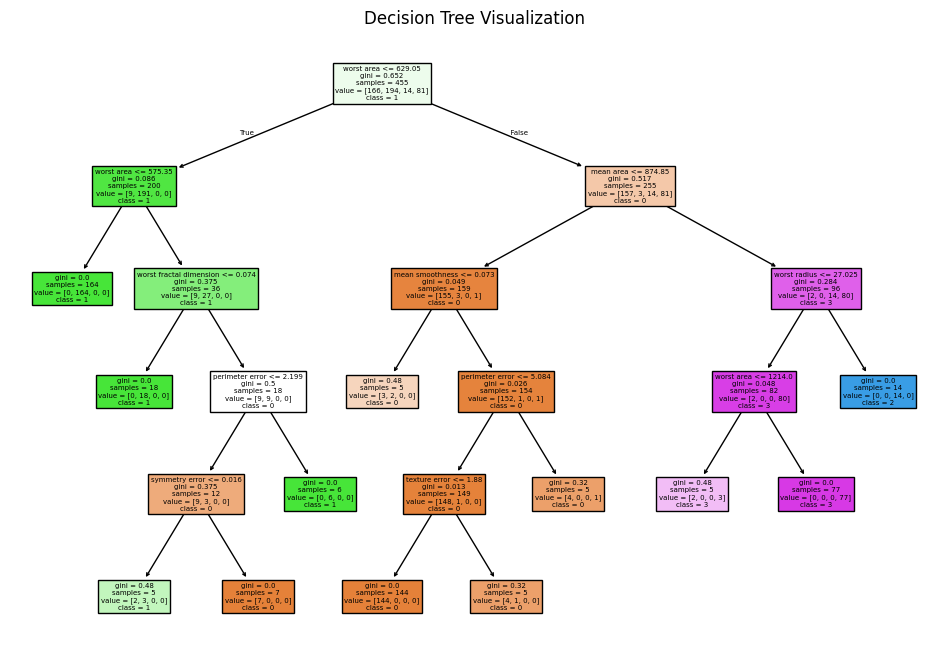

In [51]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5, min_samples_split=10, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=breasst_cancer.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [52]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=breasst_cancer.columns.tolist())


Optimization started

Training time: 20.31s, epochs: 200

Least training loss reached: 0.019


In [53]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.645] R42: 0.402 < radius error < 0.593
			0: 0.476	1: 0.013	2: 0.000	3: 0.386	Unc: 0.125

	[0.631] R18: 0.096 < mean smoothness < 0.105
			0: 0.595	1: 0.000	2: 0.004	3: 0.070	Unc: 0.331

	[0.601] R7: mean texture > 22.059
			0: 0.522	1: 0.000	2: 0.171	3: 0.000	Unc: 0.307

	[0.561] R22: 0.104 < mean compactness < 0.139
			0: 0.417	1: 0.000	2: 0.000	3: 0.340	Unc: 0.244

	[0.561] R79: fractal dimension error > 0.006
			0: 0.315	1: 0.209	2: 0.000	3: 0.476	Unc: 0.000

	[0.542] R32: mean symmetry < 0.163
			0: 0.542	1: 0.000	2: 0.000	3: 0.000	Unc: 0.458

	[0.539] R23: mean compactness > 0.139
			0: 0.441	1: 0.000	2: 0.140	3: 0.078	Unc: 0.341

	[0.524] R2: 14.118 < mean radius < 16.500
			0: 0.524	1: 0.000	2: 0.000	3: 0.000	Unc: 0.476

	[0.519] R105: 0.134 < worst concavity < 0.275
			0: 0.398	1: 0.000	2: 0.000	3: 0.278	Unc: 0.324

	[0.518] R110: 0.114 < worst concave points < 0.158
			0: 0.343	1: 0.038	2: 0.000	3: 0.401	Unc: 0.218

	[0.500] R33: 0.163 

In [54]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.89
